In [1]:
#导入相关库
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

In [10]:
%pwd

'D:\\课件整理\\Python\\精英学院\\Python7期数据清洗案例课\\2、Stockholm气温数据分析'

# 数据预处理

## 导入数据

In [13]:
raw_data=pd.read_csv(r"temperature_outdoor_2014.tsv",sep='\t',header=None)
raw_data.head()

,0,1
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [14]:
data=raw_data.copy()

## 处理表头

In [16]:
data.columns=["datetime",'temperture']
data.head()

,datetime,temperture
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


## 数据探索

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
datetime      49548 non-null int64
temperture    49548 non-null float64
dtypes: float64(1), int64(1)
memory usage: 774.3 KB


In [19]:
data.drop_duplicates().shape

(49548, 2)

## 日期字段转换

- date--年月日
- time--时分秒

In [23]:
data.datetime=pd.to_datetime(data.datetime,unit='s')
data.head()

,datetime,temperture
0,2013-12-31 23:03:06,4.38
1,2013-12-31 23:13:06,4.25
2,2013-12-31 23:23:07,4.19
3,2013-12-31 23:33:07,4.06
4,2013-12-31 23:43:08,4.06


In [24]:
data.tail()

,datetime,temperture
49543,2014-12-30 22:16:33,1.56
49544,2014-12-30 22:26:33,1.62
49545,2014-12-30 22:36:34,1.62
49546,2014-12-30 22:46:35,1.62
49547,2014-12-30 22:56:35,1.75


In [28]:
data.set_index("datetime",inplace=True)

In [29]:
data.head()

,temperture
datetime,
2013-12-31 23:03:06,4.38
2013-12-31 23:13:06,4.25
2013-12-31 23:23:07,4.19
2013-12-31 23:33:07,4.06
2013-12-31 23:43:08,4.06


# 查看一年的平均气温

In [30]:
data.mean()

temperture    8.461273
dtype: float64

In [37]:
data.resample("Y")['temperture'].mean()

datetime
2013-12-31    4.166667
2014-12-31    8.461793
Freq: A-DEC, Name: temperture, dtype: float64

## 数据按年来分组之后平均气温

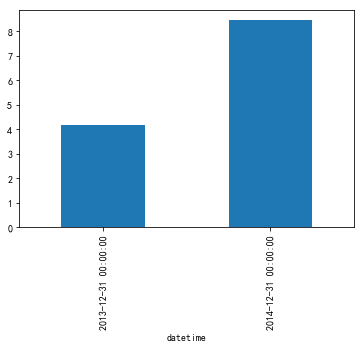

In [39]:
data.resample("Y")['temperture'].mean().plot(kind='bar')

## 每月的平均气温变化

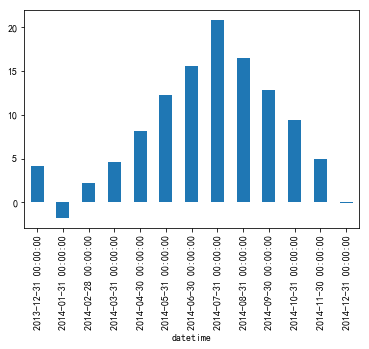

In [41]:
data.resample("M")['temperture'].mean().plot(kind="bar")

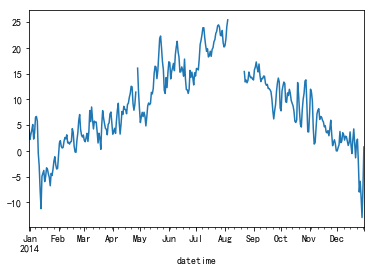

In [43]:
data.resample("D")['temperture'].mean().plot()

## 数据中一整年气温变化。

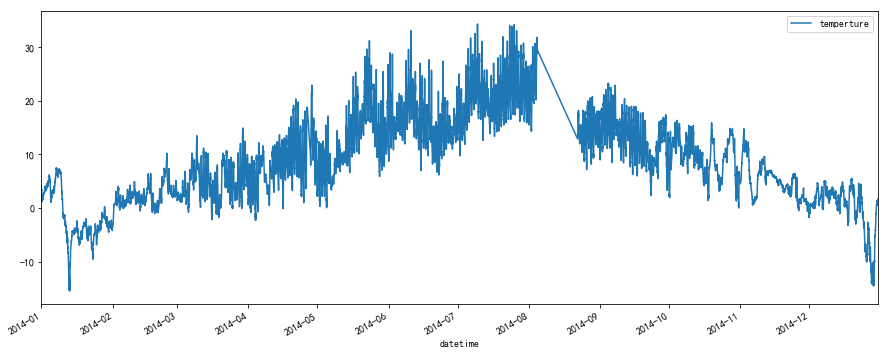

In [35]:
data.plot(figsize=(15,6))

# 查看一月份的气温

In [31]:
data['2014-01']

,temperture
datetime,
2014-01-01 00:03:09,4.06
2014-01-01 00:13:09,4.06
2014-01-01 00:23:10,4.06
2014-01-01 00:33:26,3.81
2014-01-01 00:43:26,3.62
...,...
2014-01-31 23:16:59,-3.62
2014-01-31 23:27:00,-3.56
2014-01-31 23:37:00,-3.50


# 每个月的平均气温（柱状图和箱线图）

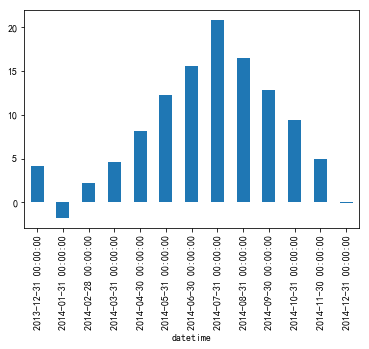

In [44]:
data.resample("M")['temperture'].mean().plot(kind="bar")

In [45]:
data.resample("M")['temperture'].mean()

datetime
2013-12-31     4.166667
2014-01-31    -1.787062
2014-02-28     2.240825
2014-03-31     4.611692
2014-04-30     8.107021
2014-05-31    12.284436
2014-06-30    15.591663
2014-07-31    20.790610
2014-08-31    16.454000
2014-09-30    12.808947
2014-10-31     9.357396
2014-11-30     4.984502
2014-12-31    -0.057848
Freq: M, Name: temperture, dtype: float64

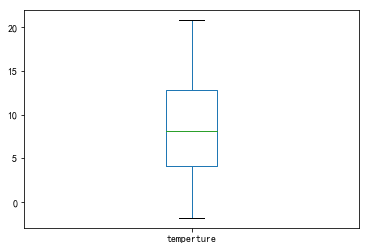

In [47]:
data.resample("M")['temperture'].mean().plot(kind='box')

In [48]:
data

,temperture
datetime,
2013-12-31 23:03:06,4.38
2013-12-31 23:13:06,4.25
2013-12-31 23:23:07,4.19
2013-12-31 23:33:07,4.06
2013-12-31 23:43:08,4.06
...,...
2014-12-30 22:16:33,1.56
2014-12-30 22:26:33,1.62
2014-12-30 22:36:34,1.62
